Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
None

Summary Statistics:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   263

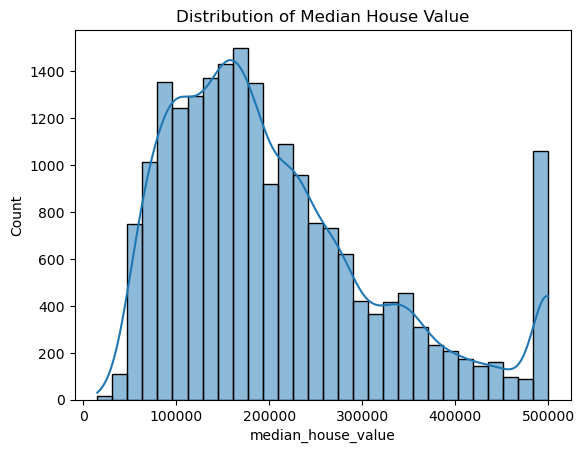

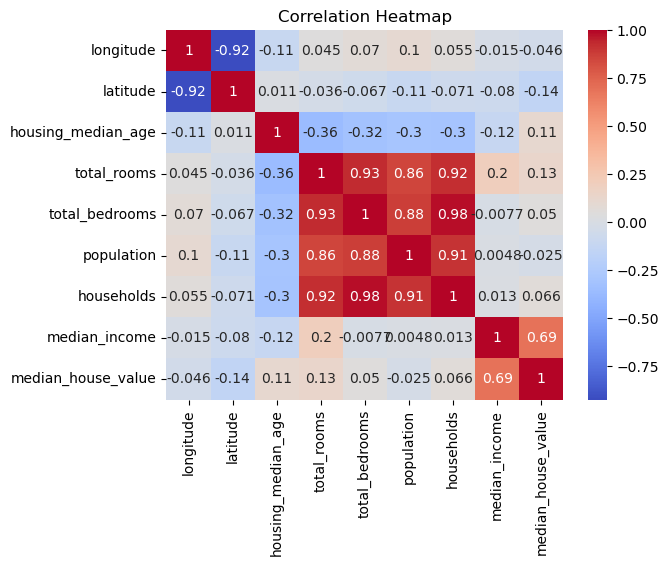

Simple Linear Regression:
RMSE: 0.17362611373591147
R² Score: 0.45885918903846656

Multiple Linear Regression:
RMSE: 0.15779439848538196
R² Score: 0.5530454493034715


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv("D:\IITG\other courses\AIML project1\Data_file - data_file.csv")

# 1. EDA: Exploratory Data Analysis
print("Dataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize the distribution of the target variable
sns.histplot(df['median_house_value'], bins=30, kde=True)
plt.title('Distribution of Median House Value')
plt.show()

# Visualize correlations with a heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 2. Preprocessing

# Handle missing values in 'total_bedrooms'
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

# Create composite features to address multicollinearity
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

# Drop highly correlated features
df.drop(columns=['total_rooms', 'total_bedrooms', 'population', 'households'], inplace=True)

# Encode categorical column
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Normalize numerical features
scaler = MinMaxScaler()
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'median_income', 'median_house_value']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# 3. Simple Linear Regression

# Splitting data for Simple Linear Regression
X_simple = df[['median_income']]  # Using only one predictor
y = df['median_house_value']
X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Train Simple Linear Regression model
model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train)

# Predict and evaluate Simple Linear Regression
y_pred_simple = model_simple.predict(X_test_simple)
rmse_simple = np.sqrt(mean_squared_error(y_test, y_pred_simple))
r2_simple = r2_score(y_test, y_pred_simple)

# 4. Multiple Linear Regression

# Splitting data for Multiple Linear Regression
X_multiple = df.drop(columns=['median_house_value'])  # Using all predictors
X_train_multiple, X_test_multiple, y_train, y_test = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

# Train Multiple Linear Regression model
model_multiple = LinearRegression()
model_multiple.fit(X_train_multiple, y_train)

# Predict and evaluate Multiple Linear Regression
y_pred_multiple = model_multiple.predict(X_test_multiple)
rmse_multiple = np.sqrt(mean_squared_error(y_test, y_pred_multiple))
r2_multiple = r2_score(y_test, y_pred_multiple)

# 5. Print evaluation metrics
print("Simple Linear Regression:")
print(f"RMSE: {rmse_simple}")
print(f"R² Score: {r2_simple}\n")

print("Multiple Linear Regression:")
print(f"RMSE: {rmse_multiple}")
print(f"R² Score: {r2_multiple}")
